<a href="https://colab.research.google.com/github/nosdeased/analise_preditiva/blob/main/%20analise_preditiva.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
Semana de Eventos - Soluções com Python 1/3

In [1]:
#instalar esses pácotes
#Mercado financeiro B3
!pip install yfinance --upgrade --no-cache-dir

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.1/59.1 KB 28.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 125.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 135.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.0/111.0 KB 54.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 KB 111.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.4/129.4 KB 148.0 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.25.1
    Uninstalling requests-2.25.1:
      Successfully uninstalled requests-2.25.1
  Attempting uninstall: html5lib
    Found existing installation: html5lib 1.0.1
    Uninstalling html5lib-1.0.1:
      Successfully uninstalled html5lib-1.0.1
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3


In [4]:
# Libs necessarias

# Pacotes analise de dados
import pandas as pd
import pandas_datareader.data as web
import numpy as np

# Pacotes analise gráfica
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

# Função para data
from datetime import datetime

# YFinance
import yfinance as yf
yf.pdr_override()

# import warnings
import warnings
warnings.filterwarnings('ignore')


**API Yahoo Finance**

O yfinance oferece uma maneira segmentada e Pythonic de baixar dados de mercado do Yahoo!Ⓡ finanças .


In [14]:
# Coletando os dados
Dados = web.get_data_yahoo( 'WEGE3.SA', period='1y' )

# Shape
Dados.shape

[*********************100%***********************]  1 of 1 completed


(251, 6)

In [15]:
# Verificando 
Dados.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-02-08,30.770000,30.940001,30.049999,30.219999,29.690407,6430500
2022-02-09,30.540001,30.969999,30.270000,30.290001,29.759184,5009700
2022-02-10,30.290001,30.549999,29.620001,29.740000,29.218821,8569200
2022-02-11,29.799999,30.010000,29.459999,29.530001,29.012501,9352700
2022-02-14,29.500000,30.940001,29.500000,30.440001,29.906553,10962400


In [16]:
# Ultimos registros
Dados.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-02-01,38.189999,38.750000,37.720001,38.389999,38.389999,6318500
2023-02-02,38.130001,38.980000,37.709999,38.040001,38.040001,7112600
2023-02-03,37.840000,38.599998,37.709999,37.910000,37.910000,8093400
2023-02-06,37.840000,38.029999,37.220001,37.570000,37.570000,6881500
2023-02-07,0.000000,0.000000,0.000000,37.669998,37.669998,0


In [20]:
# Estatistica descritiva
Dados.describe()

,Open,High,Low,Close,Adj Close,Volume
count,251.000000,251.000000,251.000000,251.000000,251.000000,2.510000e+02
mean,31.905976,32.463426,31.394701,32.072988,31.911528,8.383996e+06
std,5.142576,5.259520,5.071825,4.782338,4.853810,3.725039e+06
min,0.000000,0.000000,0.000000,22.830000,22.610668,0.000000e+00
25%,28.065001,28.630000,27.695000,28.225000,28.087862,5.994950e+06
50%,31.010000,31.620001,30.590000,31.209999,30.920303,7.571800e+06
75%,37.185001,37.715000,36.730000,37.295000,37.270000,1.014445e+07
max,40.900002,42.419998,40.480000,40.900002,40.840641,2.981270e+07


In [23]:
# Informações
Dados.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2022-02-08 to 2023-02-07
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       251 non-null    float64
 1   High       251 non-null    float64
 2   Low        251 non-null    float64
 3   Close      251 non-null    float64
 4   Adj Close  251 non-null    float64
 5   Volume     251 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 13.7 KB


## **Média Móvel**

A média móvel é um indicador que faz parte da Análise Técnica de ações. Com ela, é possível identificar o equilíbrio dos preços no mercado, observando tendências de alta, neutra ou baixa. A representação gráfica das médias móveis é normalmente feita por uma linha, que se movimenta conforme os dados novos recebidos para o cálculo.

O que é a média móvel?

A média móvel é um indicador importante que suaviza os dados dos preços das ações para formar um indicador que segue a tendência.

E como fazer esse cálculo?
Basta utilizar a fórmula: MMA = Soma dos preços de fechamento ÷ Número de dias

Considere a média móvel aritmética de 5 dias e sua evolução ao longo de 3 dias, em que os preços diários de fechamento são:
11,12,13,14,15,16 e 17.

Primeiro dia da MMA de 5 dias: (11 + 12 + 13 + 14 + 15) ÷ 5 = 13
Segundo dia da MMA de 5 dias: (12 + 13 + 14 + 15 + 16) ÷ 5 = 14
Terceiro dia da MMA de 5 dias: (13 + 14 + 15 + 16 + 17) ÷ 5 = 15


In [27]:
# Media Simples
ista = [11, 12, 13, 15, 16, 17]
  
from statistics import mean  as Media
print(f'Media: { Media(Lista)}')
print(f'Media: {(11+12+13+15+16+17) / len(Lista) } ')

Media: 14
Media: 14.0 


In [28]:
Media(Lista)

14

In [29]:
# Periodo da média móvel

n = 5

for Intervalo in range(3):
  print(f'{Intervalo}ª Dia: { sum(Lista[Intervalo:n]) / 5 }')

0ª Dia: 13.4
1ª Dia: 11.2
2ª Dia: 8.8


Text(0.5, 1.0, 'Preço Fechamento')

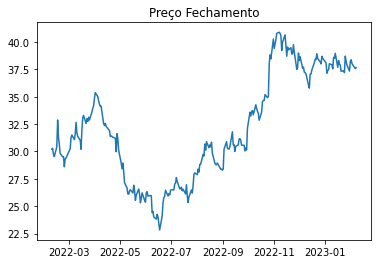

In [31]:
# Plot
plt.plot( Dados['Close'])
plt.title('Preço Fechamento')

**Função rolling**

A função rolling() é uma função do pandas que permite calcular estatísticas em janelas deslizantes de dados. <br>
Ela é muito útil para calcular médias móveis, desvios padrão, somatórios, mínimos e máximos, entre outras estatísticas.

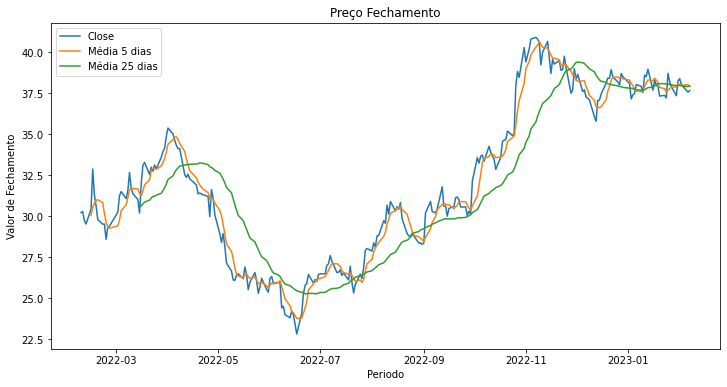

In [41]:
from pandas.core  import window
Periodo = 5
Dados['Close'].rolling( window=Periodo ).mean()

# Tamanho da imagem
plt.figure( figsize=(12, 6) )

plt.plot( Dados['Close'])
plt.plot( Dados['Close'].rolling( window=Periodo ).mean())
plt.plot( Dados['Close'].rolling( window=Periodo + 20 ).mean())
plt.title('Preço Fechamento')
plt.legend(['Close', 'Média 5 dias', 'Média 25 dias'])
plt.ylabel('Valor de Fechamento')
plt.xlabel('Periodo');

## **Plotly**

O PLOTLY é uma biblioteca Python de plotagem interativa e de código aberto que oferece suporte a mais de 40 tipos de gráficos exclusivos, abrangendo uma ampla variedade de casos de uso estatísticos, financeiros, geográficos, científicos e tridimensionais.

plotly.express (px) é uma maneira rápida e fácil de criar visualizações dinâmicas de dados.
plotly.graph_objects (go) é a API de nível inferior que concede mais controle sobre suas visualizações, mas é mais intensiva em código..

In [43]:
Periodo = 5
Dados['Media_Movel'] = Dados['Close'].rolling( window=Periodo ).mean()

Figure = px.line(
    Dados,
    y='Close',
    title='Fechamento'
)

Figure.show()
